# Ensembles
<h3> План семинара </h3>

* **Bagging** 
 - Bootstrap
 - Как построить доверительный интревал с помощью bootstrap
 - Описание композиции Bagging
 - Bagging в применении в DT

* **Bias-vairance trade-off**
  - Разложение ошибки на Bias и Variance
  - bias\variance для bagging и boosting
    
* **Random Forest** 
 - Алгоритм построения случайного леса
 - Применение RandomForest на реальной задаче (предсказание оттока клиентов)
 - Out-of-bag error
 
* **Основные выводы** 

In [1]:
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

----------
<h1 align="center">Bagging</h1> 

** Вопросы для самоконтроля**
* Зачем нужно строить композиции над алгоритмами?
* Что такое bootstrap-выборка?
* Что такие RSM, Pasting?
* Какие бывают варианты построения композиций N базовых алгоритмов классификации?
* Что такое Bagging?
* Почему работает Bagging?

### Bootstrap

<img src='img/bootstrap.png'>

** Важно! **
    - Бутстрепная выборка имеет такой же размер, что и исходная
    - Генерация с повторениями

### Bagging

## $$a_{Bagging}(x) = \frac{1}{M}\sum_{i=1}^M a_i(x)$$

$a_i(x)$ - обучен на бутстреп-выборке $X^i$

<img src='img/bagging.png'>

In [3]:
iris = load()
X = iris.data
y = iris.target

f = X.shape[1]

rnd_d3 = DecisionTreeClassifier(max_features=int(f ** 0.5)) # Решающее дерево с рандомизацией в сплитах
d3 = DecisionTreeClassifier() # Обычное решающее дерево

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

Качество классификации одним решающим деревом:

In [6]:
print("Decision tree:", cross_val_score(d3, X, y).mean())

Decision tree: 0.7718848653667595


Качество бэггинга над решающими деревьями:

In [7]:
print("Bagging:", cross_val_score(BaggingClassifier(d3), X, y).mean())

Bagging: 0.8792649334571341


- Какой недостаток есть у деревьев?
- Как bagging борется с этим недостатком?

- Как можно улучшить качество? При построении каждого узла отбирать случайные max_features признаков и искать информативное разбиение только по одному из них.

In [8]:
print("Randomized Bagging:", cross_val_score(BaggingClassifier(rnd_d3), X, y).mean())

Randomized Bagging: 0.8976369545032498


<h1 align="center">Bias-Variance Tradeoff</h1> 

###  Разложение ошибки на Bias и Variance

#### Какая природа бывает у ошибок

<img src='img/bv_darts.png' width=400>

#### Как это отражается на модели

<img src='img/bv_model_complex.png'>


### Bias-Variance tradeoff (напоминание)

$$y = f(x) + \varepsilon$$

$$\varepsilon \sim N(0, \sigma^2)$$

$$y \sim N(f(x), \sigma^2)$$

<img src='img/bv_1.png'>
<img src='img/bv_2.png'>
<img src='img/bv_3.png'>
<img src='img/bv_4.png'>
<img src='img/bv_5.png'>

### Bias\variance для Bagging

Рассмотрим задачу регрессии с базовыми алгоритмами $b_1(x), .. ,b_n(x)$. Предположим, что существует истинная функция ответа для всех объектов $y(x)$, а также задано распределение на объектах $p(x)$. В этом случае мы можем записать ошибку каждой функции регрессии:

$$\varepsilon_i(x) = b_i(x) - y(x), i=1,..,n$$

Средняя ошибка построенных функций регрессии имеет вид:
    $$E_1 = \dfrac{1}{n} E_x \varepsilon_i^2(x)$$

Предположим, что ошибки несмещены и некоррелированы:
    $$E_x \varepsilon_i(x) = 0$$
    $$E_x \varepsilon_i(x) \varepsilon_j(x) = 0, i \neq j$$

Построим теперь новую функцию регрессии, которая будет усреднять ответы построенных нами функций:
    $$a(x) = \dfrac{1}{n} \sum_{i=1}^n b_i(x)$$

Найдем ее среднеквадратичную ошибку:
<img src="img/bv_6.png">

### Random Forest

<img src='img/forest.jpeg' width=700>

##### Алгоритм построения случайного леса из $N$ деревьев

Для каждого $n = 1..N$:

Сгенерировать выборку $X_n$ с помощью бутстрэпа;
Построить решающее дерево $b_n$ по выборке $X_n$:
* по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
* дерево строится, пока в каждом листе не более $n_{min}$ объектов или пока не достигнем определенной высоты дерева
* при каждом разбиении сначала выбирается $m$ случайных признаков из $n$ исходных, и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор:
    $$ a(x) = \dfrac{1}{N} \sum_{i=1}^{N} b_i(x)$$

$m$ советуют выбирать равным:
- $\sqrt{n}$ для классификации
- $\dfrac{n}{3}$ для регрессии

### Random Forest из sklearn

Полный список параметров случайного леса для задачи регрессии:

In [9]:
"""
class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)
"""

'\nclass sklearn.ensemble.RandomForestRegressor(\n    n_estimators — число деревьев в "лесу" (по дефолту – 10)\n    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")\n    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".\n    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)\n    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)\n    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)\n    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют о

Для задачи классификации все почти то же самое, мы приведем только те параметры, которыми RandomForestClassifier отличается от RandomForestRegressor:

In [10]:
"""
class sklearn.ensemble.RandomForestClassifier(
    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.
)
"""

'\nclass sklearn.ensemble.RandomForestClassifier(\n    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")\n    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.\n)\n'


При построениии модели в первую очередь стоит обратить внимание на следующие параметры:

- n_estimators — число деревьев в "лесу"
- criterion — критерий для разбиения выборки в вершине
- max_features — число признаков, по которым ищется разбиение
- min_samples_leaf — минимальное число объектов в листе
- max_depth — максимальная глубина дерева


### Применение RandomForest на реальной задаче (предсказание оттока клиентов)

Данные можно взять тут: https://github.com/Yorko/mlcourse_open/blob/master/data/telecom_churn.csv

In [11]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv

--2024-11-24 15:43:47--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: ‘telecom_churn.csv’

telecom_churn.csv   100%[===================>] 273.43K   105KB/s    in 2.6s    

2024-11-24 15:43:53 (105 KB/s) - ‘telecom_churn.csv’ saved [279997/279997]



In [12]:
# Загружаем данные
df = pd.read_csv("telecom_churn.csv")

# Выбираем сначала только колонки с числовым типом данных
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)

# Разделяем на признаки и объекты
X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.35%


Улучшим этот результат: посмотрим, как ведут себя кривые валидации при изменении основных параметров

In [13]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 75 trees


Text(0.5, 0, 'N_estimators')

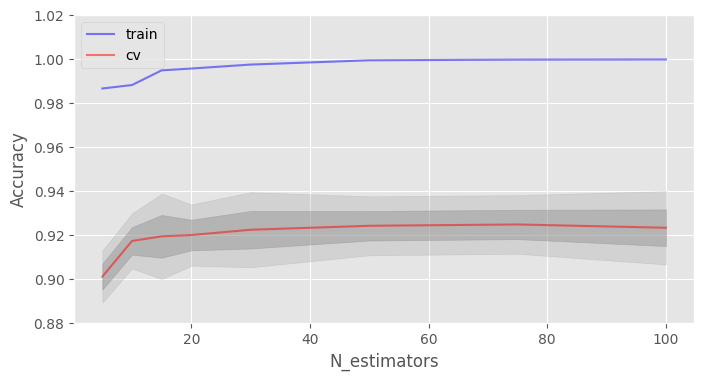

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Подбираем параметр max_depth:

In [15]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 22 max_depth


Text(0.5, 0, 'Max_depth')

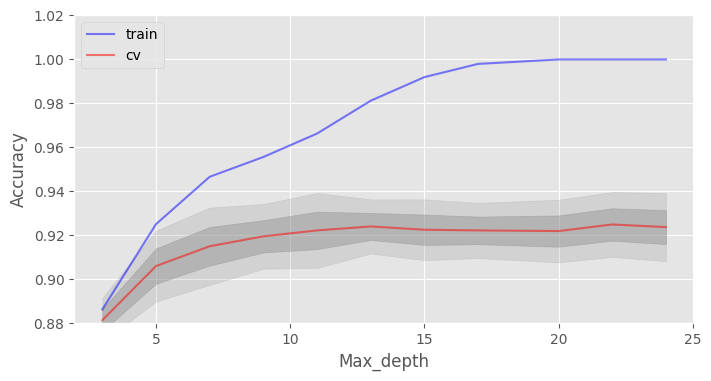

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

Параметр max_depth хорошо справляется с регуляризацией модели, и мы уже не так сильно переобучаемся. 

Параметр min_samples_leaf также выполняет функцию регуляризатора.

In [17]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.35% with 1 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

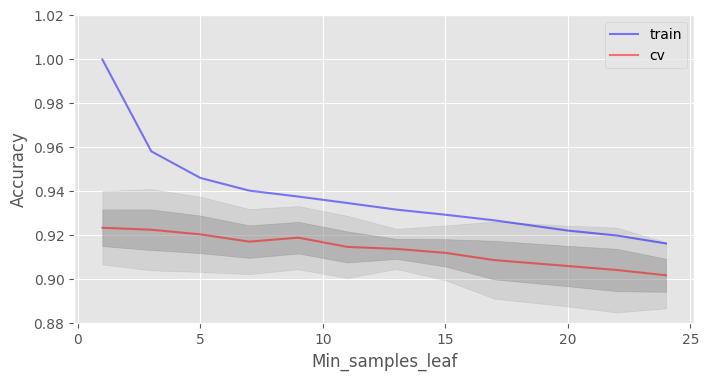

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

Рассмотрим такой параметр как max_features. Для задач классификации по умолчанию используется $\sqrt{n}$, где $n$ — число признаков.

In [19]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 14 max_features


Text(0.5, 0, 'Max_features')

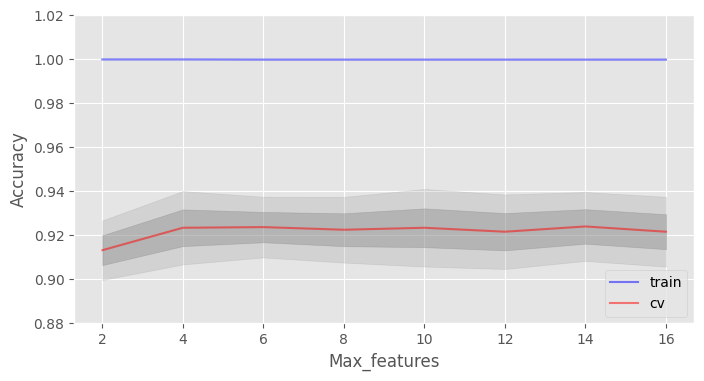

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

В нашем случае оптимальное число признаков - 10.

Итак, итоговый перебор параметров будет выглядеть следующим образом:

In [21]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

### Есть ли переобучение с увеличением числа деревьев?

In [22]:
from sklearn.metrics import accuracy_score

In [27]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9921259842519685 test_acc = 0.9204204204204204
n_estimators =   40 train_acc = 0.9985001874765654 test_acc = 0.9264264264264265
n_estimators =  100 train_acc =  1.0 test_acc = 0.9234234234234234
n_estimators =  200 train_acc =  1.0 test_acc = 0.9219219219219219
n_estimators =  600 train_acc =  1.0 test_acc = 0.9219219219219219
n_estimators = 1000 train_acc =  1.0 test_acc = 0.9204204204204204
CPU times: user 325 ms, sys: 151 ms, total: 476 ms
Wall time: 9.13 s


In [28]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9478815148106486 test_acc = 0.9294294294294294
n_estimators =   40 train_acc = 0.94750656167979 test_acc = 0.9264264264264265
n_estimators =  100 train_acc = 0.9482564679415073 test_acc = 0.9294294294294294
n_estimators =  200 train_acc = 0.9471316085489314 test_acc = 0.9264264264264265
n_estimators =  600 train_acc = 0.94750656167979 test_acc = 0.9234234234234234
n_estimators = 1000 train_acc = 0.9482564679415073 test_acc = 0.924924924924925
CPU times: user 284 ms, sys: 57.9 ms, total: 342 ms
Wall time: 4.36 s


In [29]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=14), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.983127109111361 test_acc = 0.9144144144144144
n_estimators =   40 train_acc = 0.9887514060742407 test_acc = 0.918918918918919
n_estimators =  100 train_acc = 0.9868766404199475 test_acc = 0.9219219219219219
n_estimators =  200 train_acc = 0.9891263592050994 test_acc = 0.9234234234234234
n_estimators =  600 train_acc = 0.989501312335958 test_acc = 0.9234234234234234
n_estimators = 1000 train_acc = 0.990626171728534 test_acc = 0.9234234234234234
CPU times: user 324 ms, sys: 121 ms, total: 445 ms
Wall time: 7.02 s


### Out-of-bag error

<img src='img/oob.png' width=700>

**Задача** Покажите, что примерно 37% примеров остаются вне выборки бутстрэпа и не используются при построении k-го дерева.

**Решение** Пусть в выборке $l$ объектов. На каждом шаге все объекты попадают в подвыборку с возвращением равновероятно, т.е отдельный объект — с вероятностью $\dfrac{1}{l}$. Вероятность того, что объект НЕ попадет в подвыборку (т.е. его не взяли $l$ раз): $(1-\dfrac{1}{l})^l$


$$\lim_{l \rightarrow +\infty} (1-\dfrac{1}{l})^l = \dfrac{1}{e}$$

Тогда вероятность попадания конкретного объекта в подвыборку $1 - \dfrac{1}{e} \approx 63\%$.

Out-of-Bag оценка — это усредненная оценка базовых алгоритмов на тех ~37% данных, на которых они не обучались.

### Отбор признаков с помощью случайного леса

<img src='img/features.png'>

### Как вычисляется feature importance?

Каждый узел дерева использует конкретную фичу для максимизации критерия информативности. Для каждой фичи можно посчитать взвешенное (по размеру выборки) суммарное (по всем вершинам) изменение критерия информативности. 
И с помощью полученных результатов отсортировать фичи по важности.
Для леса, данные значения можно вначале усреднить по всем деревьям, а уже затем отсортировать. 

Также можно напрямую измерять влияние фичи на качество модели. Например случайно переставлять значения какой-то фичи в тестовой выборке и смотреть как сильно ухудшается качество.

Данные можно взять здесь: https://github.com/Yorko/mlcourse_open/blob/master/data/hostel_factors.csv

In [30]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/hostel_factors.csv

--2024-11-24 15:57:14--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/hostel_factors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874 (2.8K) [text/plain]
Saving to: ‘hostel_factors.csv’

hostel_factors.csv  100%[===================>]   2.81K  --.-KB/s    in 0s      

2024-11-24 15:57:14 (16.9 MB/s) - ‘hostel_factors.csv’ saved [2874/2874]



Feature ranking:
1. Персонал 0.182942 
2. Цена/качество 0.147975 
3. Состояние общего пространства 0.128082 
4. Дополнительные услуги 0.117003 
5. ССЦ 0.105896 
6. Общие условия и удобства 0.088431 
7. Состояние общей кухни 0.074821 
8. Заезд в хостел и выезд из хостела 0.061649 
9. Бронирование хостела  0.054246 
10. Состояние комнаты 0.038956 


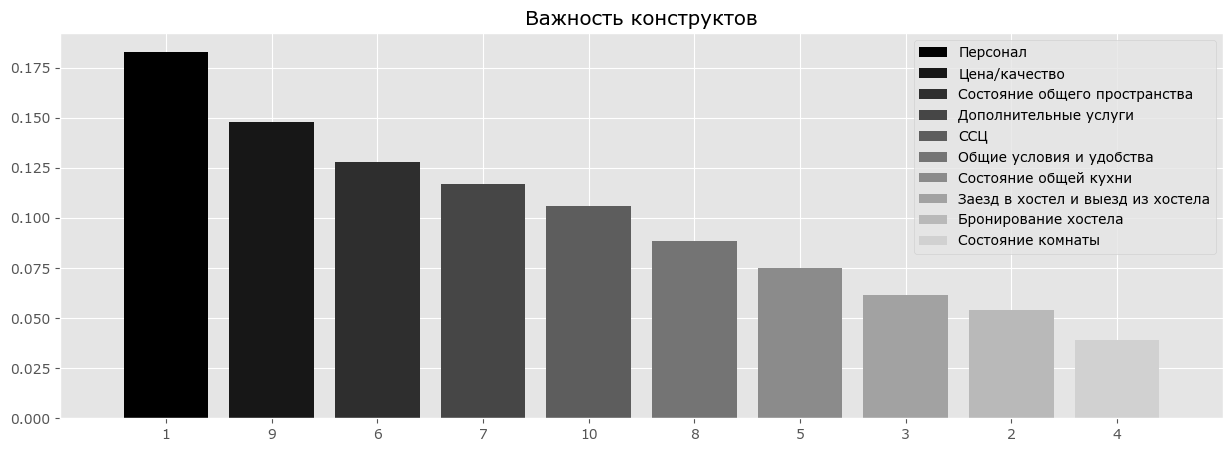

In [33]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble._forest import RandomForestRegressor

hostel_data = pd.read_csv("hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices])

<h1 align="center">Выводы</h1> 

**Bagging**:
    - Одна из лучших техник для построения алгоритмов ML
    - Линейно уменьшает разброс и не уменьшает смещение (если не коррелированы ответы базовых алоритмов) 
    - Слабое переобучение
    - НО переобучение ЕСТЬ -- от сложности одного алгоритма, лучше все же немного обрезать деревья

** Random Forest **

Плюсы:
- имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга
- практически не чувствителен к выбросам в данных из-за случайного сэмлирования
- не чувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств
- не требует тщательной настройки параметров, хорошо работает «из коробки». С помощью «тюнинга» параметров можно достичь прироста от 0.5 до 3% точности в зависимости от задачи и данных
- способен эффективно обрабатывать данные с большим числом признаков и классов
- одинаково хорошо обрабатывет как непрерывные, так и дискретные признаки
- редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, после достижения определенного количества деревьев, кривая обучения выходит на асимптоту
- для случайного леса существуют методы оценивания значимости отдельных признаков в модели
- хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна
- предполагает возможность сбалансировать вес каждого класса на всей выборке, либо на подвыборке каждого дерева
- вычисляет близость между парами объектов, которые могут использоваться при кластеризации, обнаружении выбросов или (путем масштабирования) дают интересные представления данных
- возможности, описанные выше, могут быть расширены до неразмеченных данных, что приводит к возможности делать кластеризацию и визуализацию данных, обнаруживать выбросы
- высокая параллелизуемость и масштабируемость.

Минусы:
- в отличие от одного дерева, результаты случайного леса сложнее интерпретировать
- нет формальных выводов (p-values), доступных для оценки важности переменных
- алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)
- случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса)
- алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных
- для данных, включающих категориальные переменные с различным количеством уровней, случайные леса предвзяты в пользу признаков с большим количеством уровней: когда у признака много уровней, дерево будет сильнее подстраиваться именно под эти признаки, так как на них можно получить более высокое значение оптимизируемого функционала (типа прироста информации)
- если данные содержат группы коррелированных признаков, имеющих схожую значимость для меток, то предпочтение отдается небольшим группам перед большими
- больший размер получающихся моделей. Требуется $O(NK)$ памяти для хранения модели, где $K$ — число деревьев.